In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def bresenham(xp,yp,xk,yk,data):
    assert xp < data.shape[0] and xp > 0, "Niewlasciwa wartosci x poczatkowego"
    assert xk < data.shape[0] and xk > 0, "Niewlasciwa wartosci x koncowego"
    assert yp < data.shape[1] and yp > 0, "Niewlasciwa wartosci y poczatkowego"
    assert yk < data.shape[1] and yk > 0, "Niewlasciwa wartosci y koncowego"
    
    dx = abs(xk - xp)
    
    if(xp < xk):
        przyrost_x = 1
    else:
        przyrost_x = -1
    
    dy = -1 * abs(yk - yp)
    if yp < yk:
        przyrost_y = 1
    else:
        przyrost_y = -1
        
    odchylenie_od_osi = dx + dy
    
    while True:
        data[xp,yp] = 0
        if xp == xk and yp == yk:
            break
        odchylenie_od_osi2 = 2 * odchylenie_od_osi
        
        if odchylenie_od_osi2 >= dy:
            if xp == xk:
                break
            odchylenie_od_osi = odchylenie_od_osi + dy
            xp = xp + przyrost_x
        
        if odchylenie_od_osi2 <= dx:
            if yp == yk:
                break
            odchylenie_od_osi = odchylenie_od_osi + dx
            yp = yp + przyrost_y
            
    return data

In [54]:
import numpy as np
import matplotlib.pyplot as plt
def linePZ(P1:list, P2:list, d:int, RGB:np.array) -> np.array:
    """Funkcja 

    Args:
        P1 (list): punkt poczatkowy linii
        P2 (list): punkt koncowy linii
        d (int): grubosc lini w px
        RGB (numpy.Array): tablica rgb na ktorej rysujemy prosta
    """
    assert d > 0, "Grubosc lini musi byc wieksza od 0"
    assert RGB.shape[0] > 0 and RGB.shape[1] > 0, "Nieodpowiednie wymiary tablicy RGB"
    assert P1[0] >= 0 and P1[0] < RGB.shape[0] and P1[1] >= 0 and P1[1] < RGB.shape[1], "Punkty musza znajdowac sie na tablicy RGB"
    
    #grubosc == 1
    if d == 1:
        RGB = bresenham(P1[0], P1[1], P2[0], P2[1], RGB)
        
    elif d > 1:    
        szerokosc = d // 2
        nowyPoczatek = [P1[0], P1[1] - szerokosc]
        nowyKoniec = [P2[0], P2[1] - szerokosc]
    
        for i in range(d):
            RGB = bresenham(nowyPoczatek[0],nowyPoczatek[1],nowyKoniec[0],nowyKoniec[1],RGB)
            
            if abs(P2[0] - P1[0]) > abs(P2[1] - P1[1]):
                nowyPoczatek[1] += 1
                nowyKoniec[1] += 1
            else:
                
                nowyPoczatek[0] += 1
                nowyKoniec[0] += 1
            
    return RGB

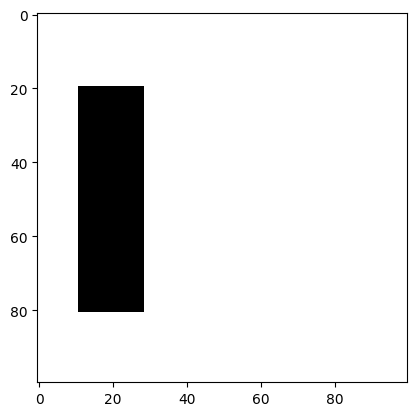

In [65]:
data = np.zeros((100,100,3), dtype=np.uint8)
data.fill(255)
P2 = [20,20]
P1 = [80,20]
linePZ(P1,P2,18,data)

plt.imshow(data,interpolation='none')